# PyMOO NSGAII

In [53]:
import matplotlib.pyplot as plt

In [54]:
import pandas as pd
import numpy as np

In [55]:
from pymoo.algorithms.soo.nonconvex.ga import GA
from pymoo.core.problem import Problem
from pymoo.optimize import minimize
from pymoo.operators.sampling.rnd import PermutationRandomSampling
from pymoo.operators.crossover.ox import OrderCrossover
from pymoo.operators.mutation.inversion import InversionMutation
from pymoo.termination.default import DefaultSingleObjectiveTermination

In [56]:
def get_paths(x,distance_matrix):
    path = []
    for i in range(len(x)):
        x_row = x[i]
        path.append([[x_row[j],x_row[j+1]] for j in range(len(x_row)-1)])    
    path = np.array(path)
    return path

In [57]:
def get_travelling_distance(distance_matrix, path, n_pop):
    distance = []
    for i in range(n_pop):
        distance_row = []
        for j in range(len(path[i])):
            path_ij = path[i,j]
            distance_row.append(distance_matrix[path_ij[0],path_ij[1]])
        distance.append(distance_row)
    return np.array(distance)


## Perform GA

In [58]:
class CustomPermutationProblem(Problem):
    def __init__(self, max_gene,distance_matrix, max_distance):
        super().__init__(
            n_var=max_gene,
            n_obj=1,  # Number of objectives
            n_constr=1,  # Number of constraints
            xl=0,  # Lower bounds for variables
            xu=len(distance_matrix) - 1,  # Upper bounds for variables
        )

        self.distance_matrix = distance_matrix
        self.max_distance = max_distance
 
    def _evaluate(self, x, out, *args, **kwargs):
        # permutation with replacement problem

        # get paths from individuals -> pair the next nearest genes
        path = get_paths(x,self.distance_matrix)

        #calculate travelling distances from paths
        traveling_distance = get_travelling_distance(self.distance_matrix,path, len(x))
        total_traveling_distance = np.sum(traveling_distance, axis = 1)

        # Objectives
        f1 = total_traveling_distance # minimize travelling distance/ duration
     

        # Constraints
        if self.max_distance == 'no limit':
            g1 = -total_traveling_distance
        else:
            g1 = total_traveling_distance - self.max_distance # distance limit


        out["F"] = f1 # Set the objective values
        out["G"] = g1

        

In [59]:
df = pd.read_csv("E:\Work\DS\Optimization\Term Project\git\data.csv")

In [60]:
df.head()

,Unnamed: 0,No,name,type,rating,count,code location,link,Gene code,lat_long
0,0,1,Taste Cafe,NaN,4.6,457,QXW7+36 เทศบาลนครเชียงใหม่ อำเภอเมืองเชียงใหม่...,https://maps.app.goo.gl/KS5jRncaRgY9c8Vs5,a1,"(18.7951875, 98.9630625)"
1,1,2,yesterday cafe',NaN,4.4,135,QXW8+QF เทศบาลนครเชียงใหม่ อำเภอเมืองเชียงใหม่...,https://maps.app.goo.gl/iWJY4rcZj5ot4b1b6,a2,"(18.7969375, 98.96618749999999)"
2,2,3,Nine One Coffee,NaN,4.7,439,QXW8+QQ เทศบาลนครเชียงใหม่ อำเภอเมืองเชียงใหม่...,https://maps.app.goo.gl/aMEKVtvdbR8n1xMCA,b1,"(18.7969375, 98.9669375)"
3,3,4,Morestto,NaN,4.7,297,QXX7+WJ เทศบาลนครเชียงใหม่ อำเภอเมืองเชียงใหม่...,https://maps.app.goo.gl/t4a7mG1SLNfjDEAh8,b2,"(18.7998125, 98.9640625)"
4,4,5,Ristr8to Original,NaN,4.7,644,QXX8+MV เทศบาลนครเชียงใหม่ อำเภอเมืองเชียงใหม่...,https://maps.app.goo.gl/WatnZ6gn7NCcAkgk7,c1,"(18.7991875, 98.9671875)"


In [61]:
'''distance_matrix = np.array([[ 0,  20,  40,  60],
                            [80,  0,  70,  10],
                            [30, 90,  0,  50],
                            [70, 40,  10,  0]])'''

#distance_matrix = pd.read_csv("E:\Work\DS\Optimization\Term Project\git\distance_matrix.csv", header =None).values
distance_matrix = pd.read_csv("E:\Work\DS\Optimization\Term Project\git\duration_matrix.csv", header =None).values
is_duration = True

In [62]:
# this is for output naming for export purpose
if is_duration:
    matrix_type = "max_duration"
    unit = "seconds"
else:
    matrix_type = "max_distance"
    unit = "metres"

In [63]:
distance_matrix.shape

(48, 48)

In [64]:
#ratings = np.array([ 4,  4,  2,  3])

ratings = df['rating'].values


In [65]:
ratings.shape

(48,)

In [66]:
# set max_distance/duration here
max_distance = 'no limit'
if max_distance == 'no limit':
    unit = ''

In [67]:
def create_submatrix(matrix, indices):
    # Assuming matrix is a NumPy array
    # indices is a list of 1D indices

    # Use NumPy to create a submatrix using the indices
    submatrix = matrix[indices, :][:, indices]

    return submatrix

In [68]:
# 900 seconds constraint
sol = pd.read_csv("E:\Work\DS\Optimization\Term Project\git\output//solutions//solutions_max_duration_0900seconds_3.csv", header = None)
obj_val = pd.read_csv("E:\Work\DS\Optimization\Term Project\git\output//objective function values//objective_function_values_max_duration_0900seconds_3.csv", header = None)

# 7200 seconds constraint
#sol = pd.read_csv("E:\Work\DS\Optimization\Term Project\git\output//solutions//solutions_max_duration_7200seconds_3.csv", header = None)
#obj_val = pd.read_csv("E:\Work\DS\Optimization\Term Project\git\output//objective function values//objective_function_values_max_duration_7200seconds_3.csv", header = None)

# 30000 metres constraint
#sol = pd.read_csv("E:\Work\DS\Optimization\Term Project\git\output//solutions//solutions_max_distance_30000metres_3.csv", header = None)
#obj_val = pd.read_csv("E:\Work\DS\Optimization\Term Project\git\output//objective function values//objective_function_values_max_distance_30000metres_3.csv", header = None)

In [69]:
obj_val[obj_val.iloc[:,0] == 12]

,0,1
1,12.0,4.583333
3,12.0,4.583333


In [70]:
solutions = np.array([np.unique(x) for x in np.sort(sol[obj_val.iloc[:,0] == 12])])
unique_set_solutions = np.unique(solutions, axis = 0)

In [71]:
unique_set_solutions

array([[ 1,  2,  4,  8, 10, 11, 12, 14, 15, 17, 19, 20]], dtype=int64)

Get a prefered solution set:

In [72]:
results = []

for i in range(len(unique_set_solutions)):
    # if choose number of cafes
    different_places_preferred = unique_set_solutions[i]

    # project the chosen cafes onto the distance/duration matrix
    distance_sub_matrix = create_submatrix(distance_matrix, different_places_preferred)

    # Define the problem
    problem = CustomPermutationProblem(len(different_places_preferred),distance_sub_matrix,max_distance)

    # Define the optimization algorithm (genetic algorithm in this case)
    algorithm = GA(
        pop_size=30,
        sampling=PermutationRandomSampling(),   
        mutation=InversionMutation(),
        crossover=OrderCrossover(),
        eliminate_duplicates=True)

    # Optimize the problem
    # if the algorithm did not improve the last 200 generations then it will terminate (and disable the max generations)
    termination = DefaultSingleObjectiveTermination(period=200, n_max_gen=np.inf)

    result = minimize(
        problem,
        algorithm,
        termination,
        seed=1,
        verbose = True,
        save_history = True
    )

    results.append((result.X,result.F))


n_gen  |  n_eval  |     cv_min    |     cv_avg    |     f_avg     |     f_min    
     1 |       30 |  0.000000E+00 |  0.000000E+00 |  1.729767E+03 |  1.488000E+03
     2 |       60 |  0.000000E+00 |  0.000000E+00 |  1.532433E+03 |  1.173000E+03
     3 |       90 |  0.000000E+00 |  0.000000E+00 |  1.464133E+03 |  1.173000E+03
     4 |      120 |  0.000000E+00 |  0.000000E+00 |  1.413367E+03 |  1.173000E+03
     5 |      150 |  0.000000E+00 |  0.000000E+00 |  1.359100E+03 |  1.173000E+03
     6 |      180 |  0.000000E+00 |  0.000000E+00 |  1.315500E+03 |  1.164000E+03
     7 |      210 |  0.000000E+00 |  0.000000E+00 |  1.264500E+03 |  1.092000E+03
     8 |      240 |  0.000000E+00 |  0.000000E+00 |  1.220233E+03 |  1.092000E+03
     9 |      270 |  0.000000E+00 |  0.000000E+00 |  1.198133E+03 |  1.092000E+03
    10 |      300 |  0.000000E+00 |  0.000000E+00 |  1.191500E+03 |  1.092000E+03
    11 |      330 |  0.000000E+00 |  0.000000E+00 |  1.187533E+03 |  1.092000E+03
    12 |      36

    69 |     2070 |  0.000000E+00 |  0.000000E+00 |  8.525333E+02 |  7.910000E+02
    70 |     2100 |  0.000000E+00 |  0.000000E+00 |  8.525333E+02 |  7.910000E+02
    71 |     2130 |  0.000000E+00 |  0.000000E+00 |  8.515333E+02 |  7.910000E+02
    72 |     2160 |  0.000000E+00 |  0.000000E+00 |  8.515333E+02 |  7.910000E+02
    73 |     2190 |  0.000000E+00 |  0.000000E+00 |  8.496333E+02 |  7.910000E+02
    74 |     2220 |  0.000000E+00 |  0.000000E+00 |  8.496333E+02 |  7.910000E+02
    75 |     2250 |  0.000000E+00 |  0.000000E+00 |  8.496333E+02 |  7.910000E+02
    76 |     2280 |  0.000000E+00 |  0.000000E+00 |  8.495333E+02 |  7.910000E+02
    77 |     2310 |  0.000000E+00 |  0.000000E+00 |  8.472333E+02 |  7.910000E+02
    78 |     2340 |  0.000000E+00 |  0.000000E+00 |  8.457000E+02 |  7.910000E+02
    79 |     2370 |  0.000000E+00 |  0.000000E+00 |  8.457000E+02 |  7.910000E+02
    80 |     2400 |  0.000000E+00 |  0.000000E+00 |  8.457000E+02 |  7.910000E+02
    81 |     243

## Convergence

In [73]:
hist = result.history
X, F = result.X,result.F

In [74]:
n_evals = []             # corresponding number of function evaluations\
hist_F = []              # the objective space values in each generation
hist_cv = []             # constraint violation in each generation
hist_cv_avg = []         # average constraint violation in the whole population

for algo in hist:

    # store the number of function evaluations
    n_evals.append(algo.evaluator.n_eval)

    # retrieve the optimum from the algorithm
    opt = algo.opt

    # store the least contraint violation and the average in each population
    hist_cv.append(opt.get("CV").min())
    hist_cv_avg.append(algo.pop.get("CV").mean())

    # filter out only the feasible and append and objective space values
    feas = np.where(opt.get("feasible"))[0]
    hist_F.append(opt.get("F")[feas])

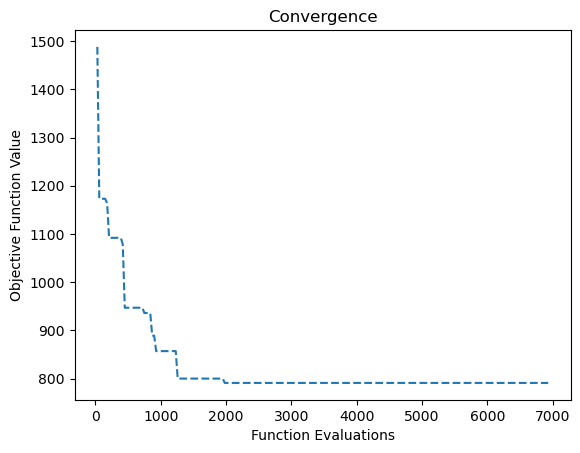

In [75]:
n_evals = np.array([e.evaluator.n_eval for e in result.history])
opt = np.array([e.opt[0].F for e in result.history])

plt.title("Convergence")
plt.xlabel("Function Evaluations")
plt.ylabel("Objective Function Value")
plt.plot(n_evals, opt, "--")
plt.show()

### Solution

First, fine the actual best path:

In [76]:
def get_tuple_with_min_second_element_and_index(tuple_list):
    if not tuple_list:
        return None, None  # Return None for an empty list

    min_index, min_value = min(enumerate(tuple_list), key=lambda x: x[1][1])
    return min_value, min_index


In [77]:
results

[(array([ 6,  4,  5,  3,  2,  7,  1,  0, 11, 10,  9,  8]), array([791.]))]

In [78]:
def array_project(array, indices):
    # Assuming array is a NumPy array
    # indices is a list of 1D indices

    # Use NumPy to create a subarray using the indices
    array = np.array(array)
    new_array = array[np.array(indices)]

    return new_array

In [79]:
final_sol = [(array_project(unique_set_solutions[i],x[0]),x[1]) for i,x in enumerate(results)]

In [80]:
for i,x in enumerate(final_sol):
    if is_duration:
        print(f'Option {i}: Travel order {x[0]} with travel time {x[1][0]} seconds.')
    else:
        print(f'Option {i}: Travel order {x[0]} with travel distance {x[1][0]} metres.')
    

Option 0: Travel order [12 10 11  8  4 14  2  1 20 19 17 15] with travel time 791.0 seconds.


In [81]:
min_tuple, min_index = get_tuple_with_min_second_element_and_index(results)

print("Best candidate for map:", min_tuple)
print("Index of the chosen solution:", min_index)

Best candidate for map: (array([ 6,  4,  5,  3,  2,  7,  1,  0, 11, 10,  9,  8]), array([791.]))
Index of the chosen solution: 0


In [82]:
X, F = min_tuple

Then, project the GA solution onto the original chosen cafe list.

In [83]:
print(f"Original solution: {X}")

Original solution: [ 6  4  5  3  2  7  1  0 11 10  9  8]


In [84]:
print(f'Order of travel: {array_project(unique_set_solutions[min_index],X)}.')
pd.DataFrame(array_project(unique_set_solutions[min_index],X)).to_csv("E:\Work\DS\Optimization\Term Project\git\output//solution_to_plot//solutions.csv",header=False, index=False)

Order of travel: [12 10 11  8  4 14  2  1 20 19 17 15].


In [85]:
if is_duration:
    print(f'Travel time: {F[0]} seconds.')
else:
    print(f'Travel distance: {F[0]} metres.')

Travel time: 791.0 seconds.


In [86]:
# get average ratings

places_in_route = array_project(unique_set_solutions[min_index],X)
avg_rating = np.average([ratings[j] for j in places_in_route])

print(f'Average Rating: {avg_rating} stars.')

Average Rating: 4.583333333333334 stars.
